### DATA AGGREGATION & GROUP OPERATIONS

In [10]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

### Group by


here we group rows considering some same cols .. and then apply aggregate fnc like mean , sum , etc 

In [2]:

data = {
    'key1': ['A', 'A', 'B', 'B', 'A', 'B', 'A'],
    'key2': ['X', 'Y', 'X', 'Y', 'X', 'Y', 'X'],
    'data1': [10, 20, 30, 40, 50, 90, 10]
}
df = pd.DataFrame(data)
print(df)

  key1 key2  data1
0    A    X     10
1    A    Y     20
2    B    X     30
3    B    Y     40
4    A    X     50
5    B    Y     90
6    A    X     10


In [3]:
means = df['data1'].groupby([df['key1'], df['key2']]).mean()
means


# key1  key2
# A     X       30.0   # mean of (10, 50)
#       Y       20.0   # mean of (20)
# B     X       30.0   # mean of (30)
#       Y       40.0   # mean of (40)
# Name: data1, dtype: float64


key1  key2
A     X       23.333333
      Y       20.000000
B     X       30.000000
      Y       65.000000
Name: data1, dtype: float64

In [4]:
sums1 = df['data1'].groupby([df['key2'], df['key1']]).sum()
sums2 = df['data1'].groupby([df['key1'], df['key2']]).sum()
print(df)
print(sums2)
print(sums1)

  key1 key2  data1
0    A    X     10
1    A    Y     20
2    B    X     30
3    B    Y     40
4    A    X     50
5    B    Y     90
6    A    X     10
key1  key2
A     X        70
      Y        20
B     X        30
      Y       130
Name: data1, dtype: int64
key2  key1
X     A        70
      B        30
Y     A        20
      B       130
Name: data1, dtype: int64


In [5]:
ansh = df['data1'].groupby([df['key1']]).sum()
print(df)
print(ansh)

  key1 key2  data1
0    A    X     10
1    A    Y     20
2    B    X     30
3    B    Y     40
4    A    X     50
5    B    Y     90
6    A    X     10
key1
A     90
B    160
Name: data1, dtype: int64


In [6]:
a = df['data1'].groupby([df['key1'], df['key2']]).count()
print(a)

key1  key2
A     X       3
      Y       1
B     X       1
      Y       2
Name: data1, dtype: int64


In [7]:
states = np.array(["OH","CA","CA","OH","OH","CA","OH"])
years = [2005,2005,2006,2005,2006,2005,2006]
df['data1'].groupby([states, years]).mean()

CA  2005    55.0
    2006    30.0
OH  2005    25.0
    2006    30.0
Name: data1, dtype: float64

In [8]:
df.groupby([df['key1'], df['key2']]).sum()

data1
key1 key2       
A    X        70
     Y        20
B    X        30
     Y       130

In [9]:
print(df.groupby([df['key1'], df['key2']])['data1'].sum())
print(df['data1'].groupby([df['key1'], df['key2']]).sum())


key1  key2
A     X        70
      Y        20
B     X        30
      Y       130
Name: data1, dtype: int64
key1  key2
A     X        70
      Y        20
B     X        30
      Y       130
Name: data1, dtype: int64


### Data Preprocessing 

Data Preprocessing invloves cleaning and engineering data in a way that it can be used as input to several important data science tasks such as data visualization, machine learning, deep learning and data analytics.

Some of the most common data preparation tasks include feature scaling, handling missing values, categorical variable encoding, data discretization.


### Feature Scaling

A dataset can have different attributes. The attributes can have different magnitudes, variances, standard deviation, mean value etc.

For instance, salary can be in thousands, whereas age is normally a two-digit number.

The difference in the scale or magnitude of attributes can actually affect statistical models.

For instance, variables with bigger ranges dominate those woth smaller ranges for linear models.

### Standardization

Standardization is the process of centering a variable at zero and standardizing the data variance to 1.

To standardize a dataset, you simply have to subtract each data point from the mean of all the data points and divide the result by the standard deviation of the data.

Feature Scaling is applied on numeric data only.


In [19]:
titanic_data = sns.load_dataset('titanic')
titanic_data = titanic_data[ ['age', 'fare', 'pclass']]
titanic_data.head()

,age,fare,pclass
0,22.0,7.2500,3
1,38.0,71.2833,1
2,26.0,7.9250,3
3,35.0,53.1000,1
4,35.0,8.0500,3


In [20]:
titanic_data.describe()

,age,fare,pclass
count,714.000000,891.000000,891.000000
mean,29.699118,32.204208,2.308642
std,14.526497,49.693429,0.836071
min,0.420000,0.000000,1.000000
25%,20.125000,7.910400,2.000000
50%,28.000000,14.454200,3.000000
75%,38.000000,31.000000,3.000000
max,80.000000,512.329200,3.000000


In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(titanic_data)
titanic_data_scaled = scaler.transform(titanic_data)
print(titanic_data_scaled)
print(titanic_data)

[[-0.53037664 -0.50244517  0.82737724]
 [ 0.57183099  0.78684529 -1.56610693]
 [-0.25482473 -0.48885426  0.82737724]
 ...
 [        nan -0.17626324  0.82737724]
 [-0.25482473 -0.04438104 -1.56610693]
 [ 0.15850313 -0.49237783  0.82737724]]
      age     fare  pclass
0    22.0   7.2500       3
1    38.0  71.2833       1
2    26.0   7.9250       3
3    35.0  53.1000       1
4    35.0   8.0500       3
..    ...      ...     ...
886  27.0  13.0000       2
887  19.0  30.0000       1
888   NaN  23.4500       3
889  26.0  30.0000       1
890  32.0   7.7500       3

[891 rows x 3 columns]


In [40]:
titanic_data_scaled = pd.DataFrame(titanic_data_scaled, columns=titanic_data.columns)
titanic_data_scaled.head()

,age,fare,pclass
0,-0.530377,-0.502445,0.827377
1,0.571831,0.786845,-1.566107
2,-0.254825,-0.488854,0.827377
3,0.365167,0.420730,-1.566107
4,0.365167,-0.486337,0.827377


<Axes: xlabel='age', ylabel='Density'>

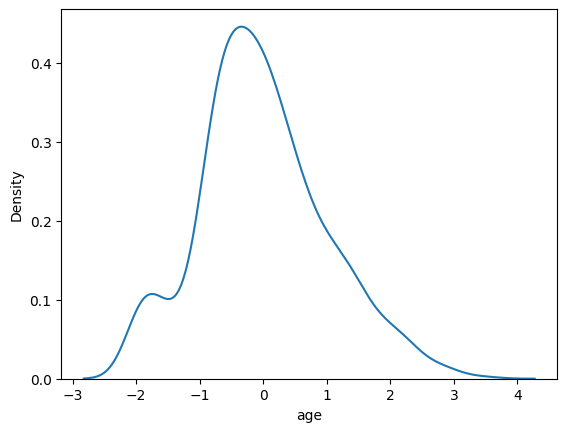

In [41]:
sns.kdeplot(titanic_data_scaled['age'])

### Min-max Scaling

In min/max scaling you subtract each value by the minimum value and then divide the result by the difference between minimum and maximum value in the dataset.




In [43]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(titanic_data)

titanic_data_scaled_minmax = scaler.transform(titanic_data)

print(titanic_data_scaled_minmax)


[[0.27117366 0.01415106 1.        ]
 [0.4722292  0.13913574 0.        ]
 [0.32143755 0.01546857 1.        ]
 ...
 [       nan 0.04577135 1.        ]
 [0.32143755 0.0585561  0.        ]
 [0.39683338 0.01512699 1.        ]]


In [45]:
titanic_data_scaled_minmax = pd.DataFrame(titanic_data_scaled_minmax, columns=titanic_data.columns)
titanic_data_scaled_minmax.head()

,age,fare,pclass
0,0.271174,0.014151,1.0
1,0.472229,0.139136,0.0
2,0.321438,0.015469,1.0
3,0.434531,0.103644,0.0
4,0.434531,0.015713,1.0


<Axes: xlabel='age', ylabel='Density'>

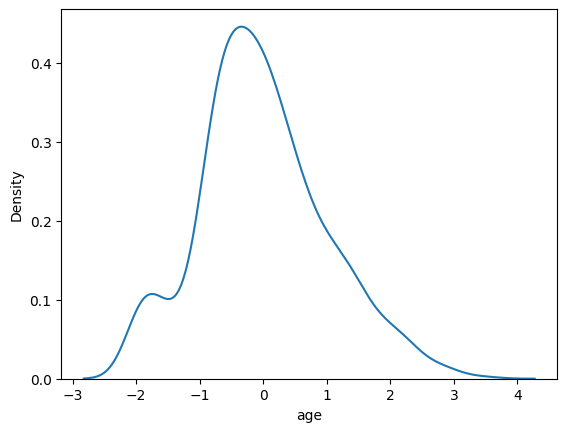

In [46]:
sns.kdeplot(titanic_data_scaled['age'])

### Handling Missing Data

Missing values are those observations in the dataset that do not contain any value.

Missing values can totally change data patterns and therefore it is extremely important to understand why missing values occur in the dataset and how to handle them.

Handling Missing Numerical Data

To handle missing numerical data, we can use statistical techniques. The use of statistical techniques or algorithms to replace missing values with statistically generated values is called imputation.


In [48]:
titanic_data = sns.load_dataset('titanic')
titanic_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [49]:
titanic_data= titanic_data[["survived","pclass","age","fare"]]

titanic_data.head()

,survived,pclass,age,fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [50]:
titanic_data.isnull().mean()

survived    0.000000
pclass      0.000000
age         0.198653
fare        0.000000
dtype: float64

In [53]:
print(titanic_data.isnull().sum())
print(titanic_data.size)

survived      0
pclass        0
age         177
fare          0
dtype: int64
3564


In [56]:
median = titanic_data.age.median()
print("Median : ", median)

mean = titanic_data.age.mean()
print("Mean : ", mean)

Median :  28.0
Mean :  29.69911764705882


In [57]:
titanic_data["Median_Age"]=titanic_data.age.fillna(median)

titanic_data['Mean_Age']=titanic_data.age.fillna(mean)

print(titanic_data.head())

titanic_data['Mean_Age']=np.round(titanic_data['Mean_Age'],1)

titanic_data.head(20)

   survived  pclass   age     fare  Median_Age  Mean_Age
0         0       3  22.0   7.2500        22.0      22.0
1         1       1  38.0  71.2833        38.0      38.0
2         1       3  26.0   7.9250        26.0      26.0
3         1       1  35.0  53.1000        35.0      35.0
4         0       3  35.0   8.0500        35.0      35.0


,survived,pclass,age,fare,Median_Age,Mean_Age
0,0,3,22.0,7.2500,22.0,22.0
1,1,1,38.0,71.2833,38.0,38.0
2,1,3,26.0,7.9250,26.0,26.0
3,1,1,35.0,53.1000,35.0,35.0
4,0,3,35.0,8.0500,35.0,35.0
5,0,3,NaN,8.4583,28.0,29.7
6,0,1,54.0,51.8625,54.0,54.0
7,0,3,2.0,21.0750,2.0,2.0
8,1,3,27.0,11.1333,27.0,27.0
9,1,2,14.0,30.0708,14.0,14.0


#### Frequent Category Imputation

One of the most common ways of jandling missing values in a categorical column is to replace the missing values with the most frequenly occuring values i.e the mode of the column.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

titanic_data = sns.load_dataset('titanic')
titanic_data = titanic_data[["embark_town","age","fare"]]

titanic_data.head()

,embark_town,age,fare
0,Southampton,22.0,7.2500
1,Cherbourg,38.0,71.2833
2,Southampton,26.0,7.9250
3,Southampton,35.0,53.1000
4,Southampton,35.0,8.0500


In [77]:
print(titanic_data.isnull().mean())
titanic_data.isnull().sum()


embark_town    0.000000
age            0.198653
fare           0.000000
dtype: float64


embark_town      0
age            177
fare             0
dtype: int64

Text(0, 0.5, 'Number of Passengers')

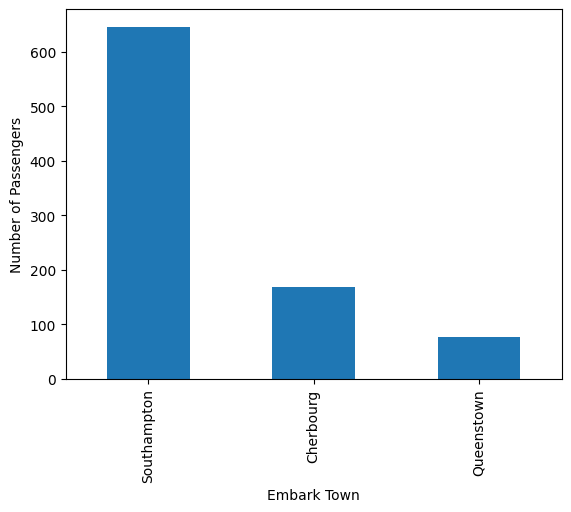

In [78]:
titanic_data.embark_town.value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel("Embark Town")
plt.ylabel("Number of Passengers")

In [79]:
titanic_data.mode()

,embark_town,age,fare
0,Southampton,24.0,8.05


In [ ]:
print(titanic_data.embark_town.mode())
# titanic_data.embark_town.fillna('Southampton', inplace=True)
titanic_data.embark_town.fillna(titanic_data.embark_town.mode()[0], inplace=True) # here [0] becz mode() return a series not a string or val we can replace .. it return series as there can be more that one mode hence we make use of index 0 [0]

titanic_data.isnull().sum()

0    Southampton
Name: embark_town, dtype: object


embark_town      0
age            177
fare             0
dtype: int64